Привіт! Сьогоднішнє заняття буде чимось проміжним між лекцією і практикою.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

# 1. Класи задач в машинному навчанні (supervised, unsupervised, reinforcement learning)

1.1 Чим відрізняються перелічені вище класи задач?

supervised - відома цільова змінна (зразки вірних відповідей)

unsupervised - цільова змінна не відома (виводиться в процесі побудови алгоритму)

reinforcement - немає вхідних даних, але є середовище і функція винагороди

1.2 Виділіть найбільш важливі задачі у supervised та unsupervised learning (приклад - регресія, відноситься до supervised)

зниження розмірності ($ a: R^n \rightarrow R^2 (R^m , m<<n) $)

supervised - класифікація, регресія, ранжування

unsupervised - кластеризація, зниження розмірності,  "aсоціація" (пошук зв'язків між елементами)

1.3 Заформалізуйте кожну із задач, які Ви привели вище.

Наприклад, задача регресії формалізується так:

X - множина об'єктів (як правило, об'єкти $ \in R^m $), y - цільова змінна (як правило, $ \in R $)

$ a: X \rightarrow R $ , метою задачі регресії є відновити відображення а за навчальною вибіркою

Класифікація:

X - множина об'єктів (як правило, об'єкти $ \in R^m $), y - цільова змінна ($\in K$, K - множина класів, вона скінченна і ми її знаємо заздалегідь) на вхід йдуть пари ($x_i$, $y_i$)

$ a: X \rightarrow K $

Кластеризація:

X - множина об'єктів (як правило, об'єкти $ \in R^m $), цільова змінна невідома

$ a: X \rightarrow C $ (C - множина кластерів, невідома заздалегідь)

Ранжування

X - множина запитів, цільова змінна - відповіді + їх порядок, навчальна вибірка - ($x_i$, ($ans_i$, $r_i$))

$a: X \rightarrow Ans * R $, де Ans - множина відповідей, R - релевантність відповідей

Зниження розмірності

X - об'єкти із $R^n$, цільова змінна - невідома (будуємо низьковимірне представлення)

$ a: X \rightarrow R^2 (R^m, m<<n) $

1.4 Заформалізуйте практичні кейси з точки зору термінології машинного навчання.

Наприклад, кейс "оцінка вартості житла" формалізується так:

X - множина будинків (зокрема, ознаки будинка - район міста, житлова площа, поверх тощо)
y - цільова змінна (ціна житла)

$ a: X \rightarrow R $, це задача регресії (supervised learning), необхідно навчитись оцінювати вартість житла за його ознаками

-визначаємо, яка тварина на зображенні;

вхідні дані - ознаки тварин (хутро, розмір очей, тощо), або зображення напряму, 

цільова змінна - назва тварини (або клас), тип задачі - класифікація

-прогноз погоди;

вхідні дані - історія температур, інші фізичні чинники (наприклад, локація, висота..) , цільова змінна - температура повітря, тип задачі - регресія

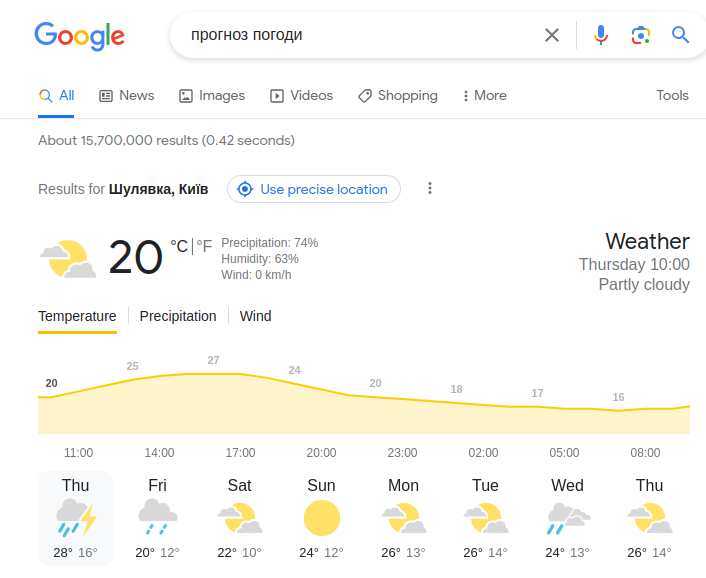

In [3]:
Image("weather.png", width=400)

-банк прогнозує, чи поверне клієнт кредит (і з якою ймовірністю поверне)

вхідні дані - умови кредиту, зп,кредитна історія,вік,стать,фізичне розташування (портрет клієнта), цільова змінна - ймовірність повернення, тип задачі - регресія 

вхідні дані - умови кредиту, зп,кредитна історія,вік,стать,фізичне розташування (портрет клієнта), цільова змінна - мітка "повернув" або "не повернув", тип задачі - класифікація

-інформаційний пошук

вхідні дані - ключові слова (запити), цільова змінна - список відповідей + їх порядок, тип задачі - ранжування

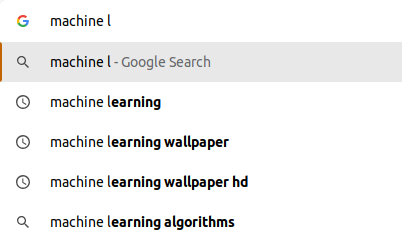

In [10]:
Image("search.png", width=300)

-сегментація зображень

вхідні дані - зображення, цільова змінна - сегменти зображення, тип задачі - сегментація + класифікація, обидві - навчання з учителем (чітко фіксуємо список об'єктів, які могли би зустрічатись на зображеннях)

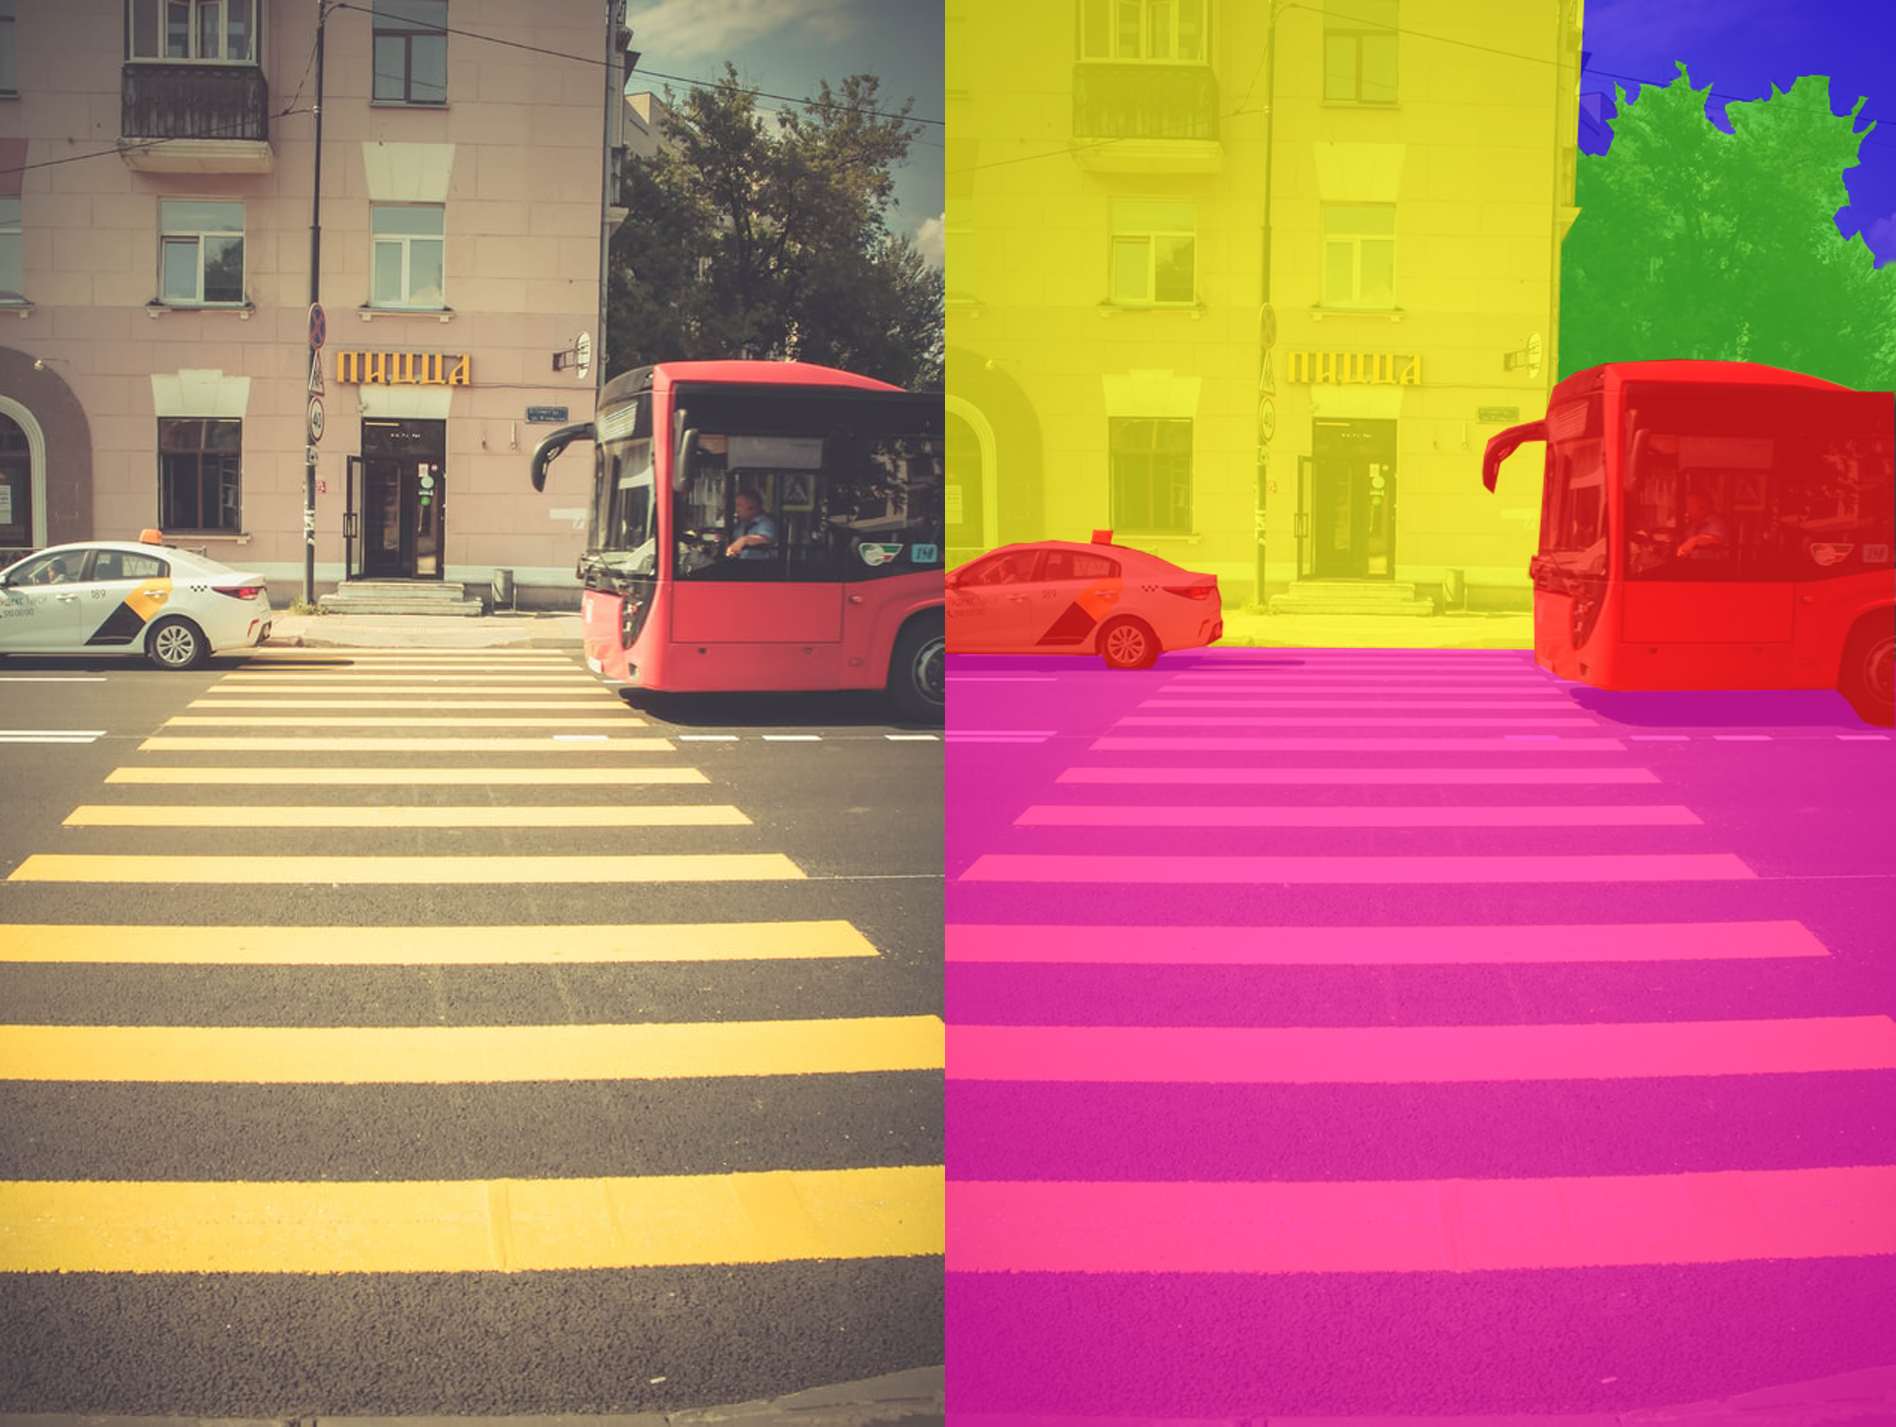

In [5]:
Image("segmentation.png", width=400)

-спрощення кольорової гами зображення

вхідні дані - зображення, цільова змінна - спрощене зображення (його сегменти), тип задачі - навчання без учителя

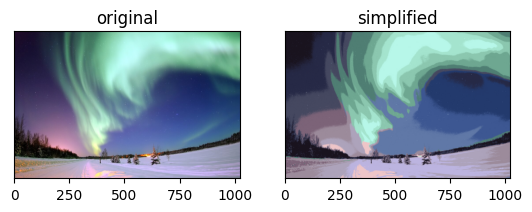

In [6]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(plt.imread("polar_orig.jpg")); axs[0].set_title("original"); axs[0].set_yticks([]);
axs[1].imshow(plt.imread("polar_simplified.png")); axs[1].set_title("simplified"); axs[1].set_yticks([]);

-машинний переклад

вхідні дані - тексти англійською, цільова змінна - текст українською, тип задачі - ранжування (під кожне слово ранжований список відповідників)

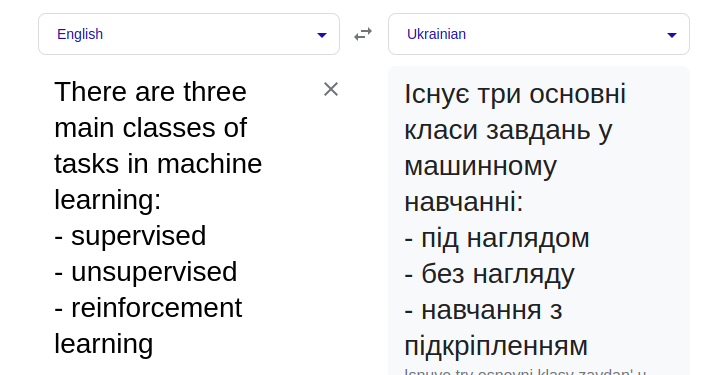

In [8]:
Image('translate.png', width=400)

# 2. Постановка задач машинного навчання та лінійна регресія.

Найбільш поширений клас задач у машинному навчанні - supervised learning. Зокрема, розглянемо його детальніше:

X - ознаки об'єктів, y - цільова змінна. В такому випадку, метою навчання є відновити відображення:

$ a: x \rightarrow y $, 

де $ y \in K $ (класифікація, де K - скінченна множина класів),

$ y \in R $ (регресія, цільова змінна із множини дійсних чисел)

Виникає природне питання - як оцінити розбіжність оригінального значення y та оціненого значення a(x)? Зокрема, це часто роблять функцією втрат.

Нехай x,y - об'єкт, взятий із вибірки даних. а(x) - оцінка y за даними x.

$ L(a(x), y) $ - функція, що оцінює розбіжність між a(x) та y. Наприклад, для задач регресії:

$ L(a(x), y) = (a(x) - y)^2 $ - mean squared error, 
$ L(a(x), y) = | a(x) - y | $ - mean absolute error

### Метод мінімізації емпіричного ризику.

Зокрема, ідея полягає в тому, щоб підібрати таке відображення а, яке максимально відповідає навчальним даним

$$ \sum_{x_k \in X} L(a(x_k), y_k) \rightarrow min_{a} $$

### Лінійна регресія

В термінах, що згадані вище, можна конкретизувати задачу у випадку лінійної регресії:

$ a(x) = (\beta, x) = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$ (можна також, + $\beta_0$ - вільний член)

$ L(a(x), y) = (a(x) - y)^2 $

Тоді, загальна функція втрат набуває вигляд:

$$ L(X) = \sum_{x_k \in X} (y_k - (\beta, x_k))^2 \rightarrow min_{\beta} $$



$ \frac{dL}{d\beta_1} = \sum_{x_k \in X} 2(y_k - (\beta, x_k))(-x_{k1})$

...

$  \frac{dL}{d\beta_i} = \sum_{x_k \in X} 2(y_k - (\beta, x_k))(-x_{ki})$

1. Градієнтний спуск

$ grad L = (\frac{dL}{d\beta_1}, .... \frac{dL}{d\beta_n}) $

$ L(\beta) = L(\beta) - \alpha grad L(\beta) $ 

2. Нормальне рівняння

$ L(X) = || X \beta - y||^2 \rightarrow min_{\beta} $

$ \frac{dL}{d\beta} = 2 X^T (X \beta - y) = 0 $

$ X^T X \beta = X^T y , \beta = (X^T X)^{-1} X^T y$

Давайте порівняємо два методи:
-кількість ітерацій (градієнтний спуск потребує більше ітерацій)
-обчислювальну складність (по перше, може не бути оберненої, по друге - проблеми з високими розмірностями)

$ X \in Mat(3,2000), X^T \in Mat(2000,3) , X^T X \in Mat(2000,2000), (X^T X)^{-1} \in Mat(2000,2000)$ 

Проблеми виникають, коли в X є кореляції величини 1, в такому випадку $ X^T X $ - вироджена

Градієнтний спуск може викликати велику кількість ітерацій, але у сумі вони легші ніж одне обернення великої матриці в нормальному рівнянні.